url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv" diamonds = pd.read_csv(url) 

1. ML (RF, DT, LR) 수행

2. Dense layer만 이용 FNCC 구현

3. 순환 데이터 변환후 CNN 구현



각 단계별로 수행완료후

검사받은 이후에 다음 단계 진행

In [1]:
from os import X_OK
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder,OneHotEncoder,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
import warnings

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv", index_col=0)
df

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


In [3]:
# 결측치 확인
df.isnull().sum()

cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

C:\Users\akasa\AppData\Local\Temp\ipykernel_19292\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


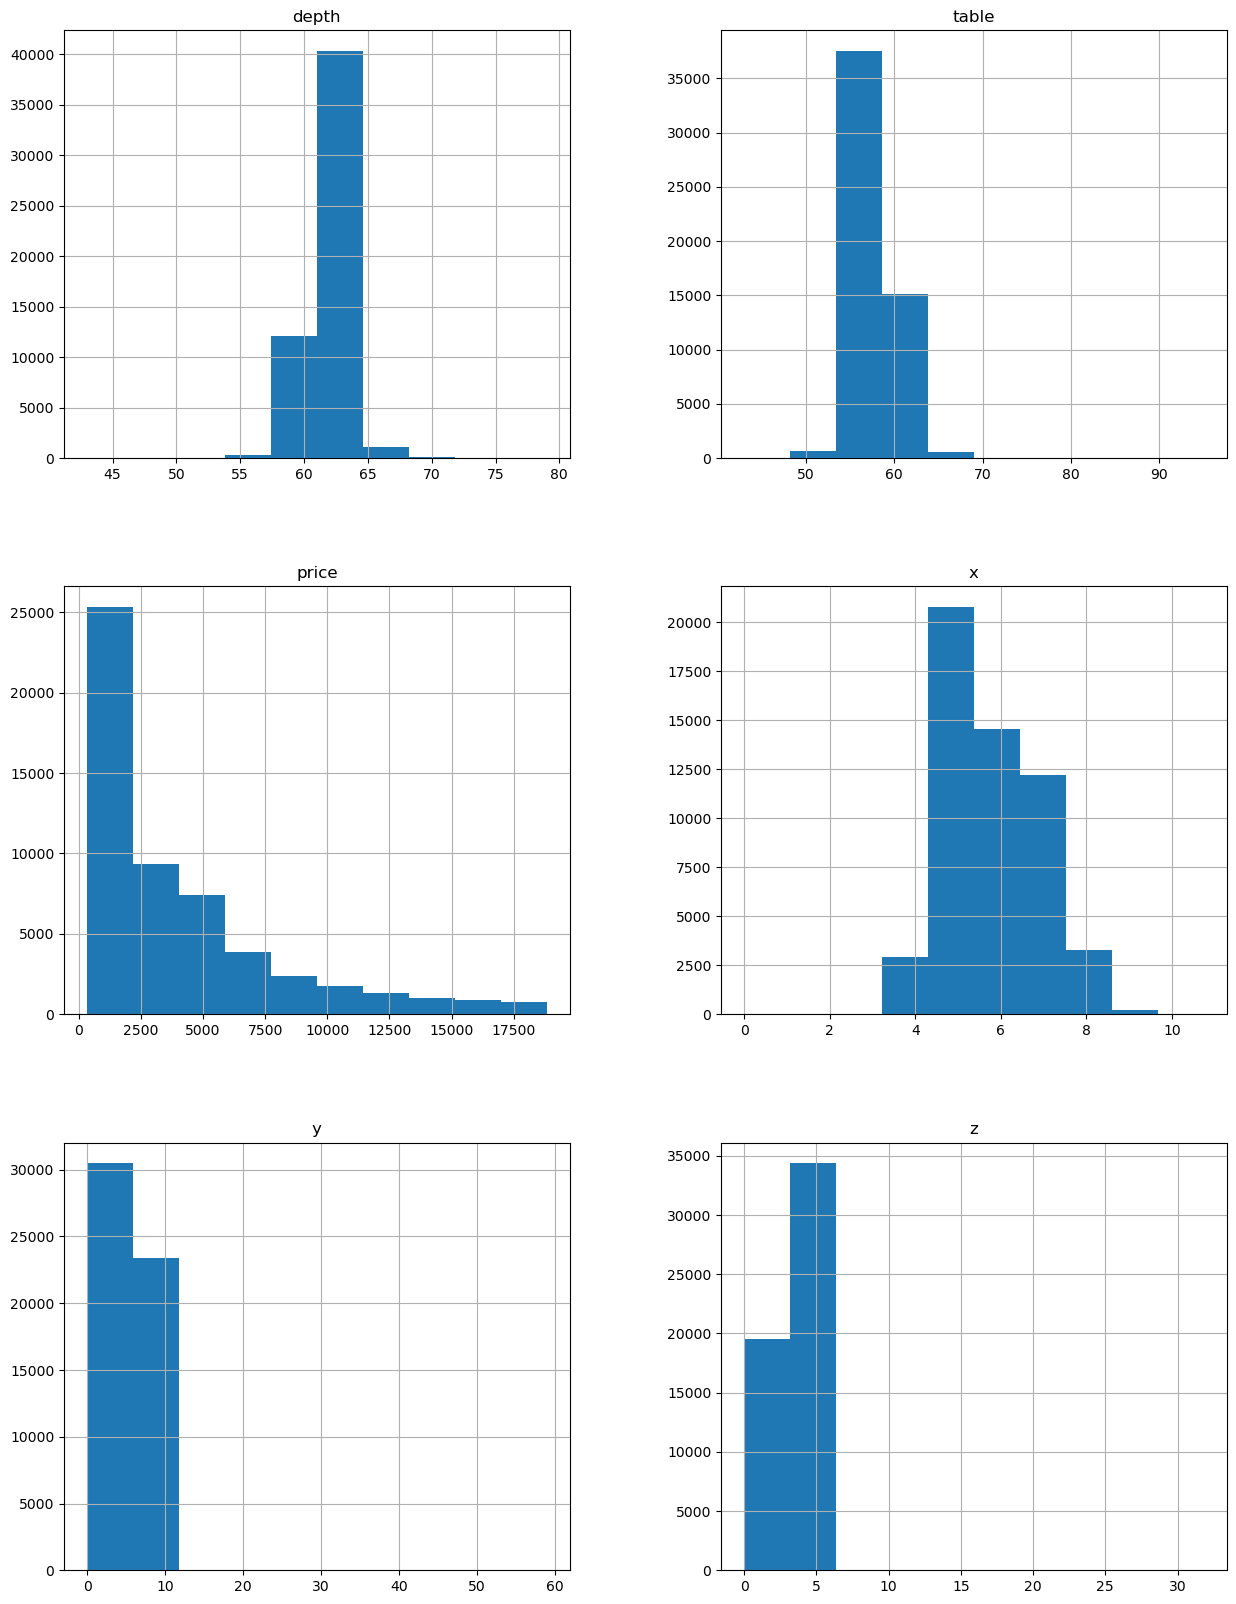

In [4]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [5]:
df.dtypes

cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [6]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [7]:
df['color'].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

In [8]:
df['clarity'].value_counts()

clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64

In [9]:
target_label = df['cut']
target_label.dtype
mapping = {'Ideal':0, 'Premium':1,'Very Good':2,'Good':3,'Fair':4}
df['cut'] = target_label.map(mapping)
df.head()

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,0,E,SI2,61.5,55.0,326,3.95,3.98,2.43
0.21,1,E,SI1,59.8,61.0,326,3.89,3.84,2.31
0.23,3,E,VS1,56.9,65.0,327,4.05,4.07,2.31
0.29,1,I,VS2,62.4,58.0,334,4.20,4.23,2.63
0.31,3,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [10]:
target_label = df['clarity']
target_label.dtype
mapping = {'SI1':0, 'VS2':1,'SI2':2,'VS1':3,'VVS2':4,'VVS1':5,'IF':6,'I1':7}
df['clarity'] = target_label.map(mapping)
df.head()

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,0,E,2,61.5,55.0,326,3.95,3.98,2.43
0.21,1,E,0,59.8,61.0,326,3.89,3.84,2.31
0.23,3,E,3,56.9,65.0,327,4.05,4.07,2.31
0.29,1,I,1,62.4,58.0,334,4.20,4.23,2.63
0.31,3,J,2,63.3,58.0,335,4.34,4.35,2.75


In [11]:
target_label = df['color']
target_label.dtype
mapping = {'G':0, 'E':1,'F':2,'H':3,'D':4,'I':5,'J':6}
df['color'] = target_label.map(mapping)
df.head()

,cut,color,clarity,depth,table,price,x,y,z
carat,,,,,,,,,
0.23,0,1,2,61.5,55.0,326,3.95,3.98,2.43
0.21,1,1,0,59.8,61.0,326,3.89,3.84,2.31
0.23,3,1,3,56.9,65.0,327,4.05,4.07,2.31
0.29,1,5,1,62.4,58.0,334,4.20,4.23,2.63
0.31,3,6,2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="depth")
plt.xlabel("depth")
plt.ylabel("count")
plt.title("depth count")

Text(0.5, 1.0, 'depth count')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="table")
plt.xlabel("table")
plt.ylabel("count")
plt.title("table count")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="x")
plt.xlabel("x")
plt.ylabel("count")
plt.title("y count")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="z")
plt.xlabel("z")
plt.ylabel("count")
plt.title("z count")

In [ ]:
df['depth'].unique()

In [ ]:
df['depth'].min()

In [ ]:
df['depth'].max()

In [ ]:
df['z'].unique()

In [ ]:
print(df['z'].min())
print(df['z'].max())

In [ ]:
data = df[(df['depth']>=43.0) & (df['depth']<=79.0)]

# depth의 고유한 값들을 0부터 시작하는 인덱스로 재매핑
unique_depth = sorted(data['depth'].unique())  # 고유한 값들을 정렬
encoding_map = {depth: idx for idx, depth in enumerate(unique_depth)}  # 재매핑

# 인코딩 적용
df['depth'] =data['depth'].map(encoding_map)

In [ ]:
data = df[(df['z']>=0.0) & (df['z']<=31.8)]

# z의 고유한 값들을 0부터 시작하는 인덱스로 재매핑
unique_z = sorted(data['z'].unique())  # 고유한 값들을 정렬
encoding_map = {z: idx for idx, z in enumerate(unique_z)}  # 재매핑

# 인코딩 적용
df['z'] =data['z'].map(encoding_map)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="depth")
plt.xlabel("depth")
plt.ylabel("count")
plt.title("depth count")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(['cut','color','clarity','depth','table'],axis=1)

In [ ]:
import numpy as np
import pandas as pd

def remove_outliers(data, column):
    # 사분위수를 이용해 이상치 제거
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1  # IQR: Interquartile Range (사분위 범위)
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # 이상치가 아닌 데이터만 필터링
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

In [ ]:
df_cleaned = remove_outliers(df,df.columns)

In [ ]:
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum()

In [ ]:
X =df_cleaned.drop('price',axis=1)
y = df_cleaned['price']

In [ ]:
y

In [ ]:
X.isnull().sum()

In [ ]:
preprocessor = StandardScaler()
# 데이터 전처리 및 분할 (이전과 동일한 방식)
X_processed = preprocessor.fit_transform(X)

# 데이터를 훈련+검증 세트와 테스트 세트로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)  

In [ ]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))

In [ ]:
def categorize_price(price):
    if price <= 1000:
        return 0  # 클래스 0
    else:
        return 2  # 클래스 1

# Rings 컬럼에 범주형 변환 적용
y_categorized = df_cleaned['price'].apply(categorize_price)

In [ ]:
preprocessor = StandardScaler()
# 데이터 전처리 및 분할 (이전과 동일한 방식)
X_processed = preprocessor.fit_transform(X)

# 데이터를 훈련+검증 세트와 테스트 세트로 나누기
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y_categorized, test_size=0.2, random_state=42)

# 훈련+검증 세트를 훈련 세트와 검증 세트로 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)  

In [ ]:
#Random forest
print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))

In [ ]:
#Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))

warnings.filterwarnings('ignore')